In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Exercise 11.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

x_train = x_train[y_train.flatten() == 1]
x_test = x_test[y_test.flatten() == 1]

In [3]:
x_train.shape

(5000, 32, 32, 3)

In [4]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        # (-1 ~ 1) to (0 ~ 1)
        image = (image + 1) / 2
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap='binary')
        plt.axis("off")

In [5]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))
        for x_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            x_fake_and_real = tf.concat([generated_images, x_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(x_fake_and_real, y1)

            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
            
        if epoch + 1 <= 5 or (epoch + 1) % 5 == 0:
            plot_multiple_images(generated_images, 8)
            plt.show()

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(8 * 8 * 256, input_shape=[codings_size]),
    keras.layers.Reshape([8, 8, 256]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(128, kernel_size=5, strides=2, padding='SAME',
                                 activation='selu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(3, kernel_size=5, strides=2, padding='SAME',
                                 activation='tanh'),
])

discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding='SAME',
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[32, 32, 3]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding='SAME',
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

gan = keras.models.Sequential([generator, discriminator])

In [7]:
discriminator.compile(loss='binary_crossentropy', 
                      optimizer='rmsprop')
discriminator.trainable = False
gan.compile(loss='binary_crossentropy',
            optimizer='rmsprop')

In [8]:
x_train_dcgan = x_train.reshape(-1, 32, 32, 3) * 2. - 1.

In [9]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(x_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

Epoch 1/50


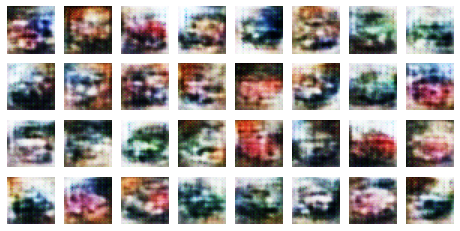

Epoch 2/50


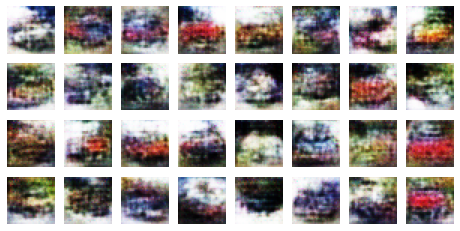

Epoch 3/50


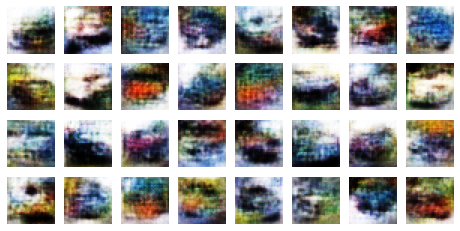

Epoch 4/50


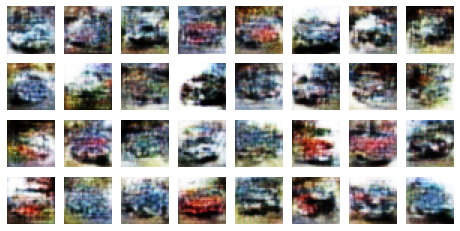

Epoch 5/50


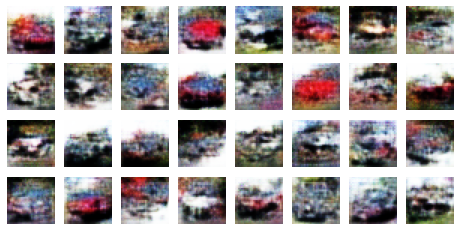

Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50


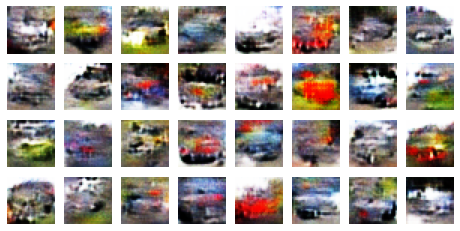

Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50


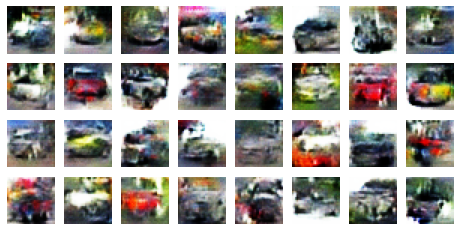

Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50


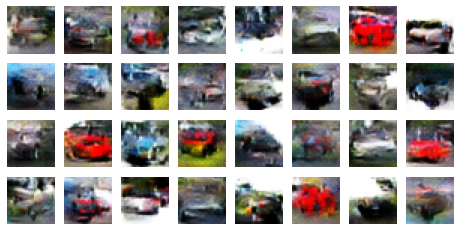

Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50


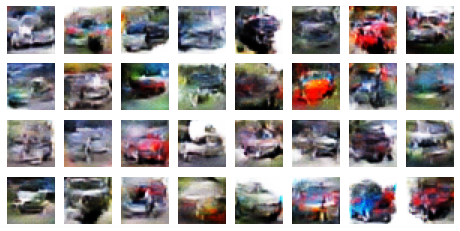

Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50


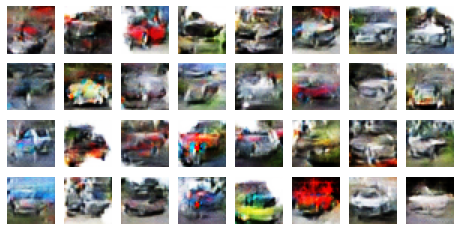

Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50


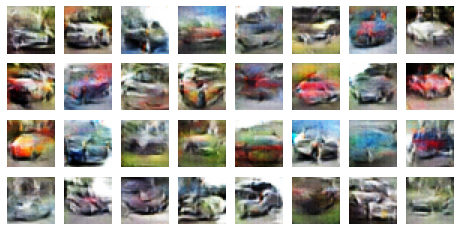

Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50


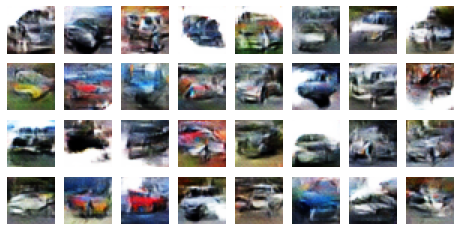

Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50


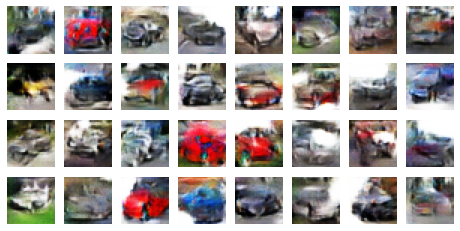

Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


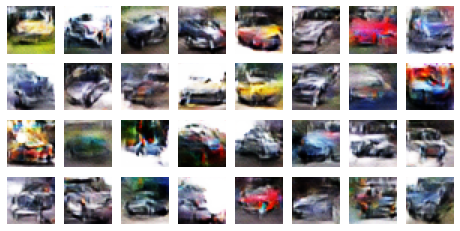

In [10]:
train_gan(gan, dataset, batch_size, codings_size)

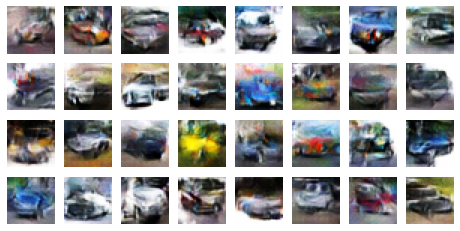

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)